# Pisa 2012 Data Exploration
### by Gabriela Sikora

## Introduction
This notebook will be dedicated to exploring details of the PISA 2012 dataset. PISA, in particular, is a "survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school" (Udacity, 2019).

Within this datset we can find information for about 510,000 students. The PISA 2012 dataset includes information on mathematics, reading in the test language, and science.


Throughout the course of this notebook I will have these two questions in mind:

- Are there differences in achievement based on gender, location, or parental education levels?
- Is there a relationship between the amount of time a student dedicates to learning and their score? 

## Preliminary Wrangling 
To begin, let's start off by assessing the dataset and cleaning any remaining issues.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pisa = pd.read_csv('pisa_df.csv')

In [3]:
pisa.shape

(45907, 18)

In [4]:
pisa.dtypes

Student ID                                         int64
Gender                                            object
Out-of-School Study Time - Homework              float64
Out-of-School Study Time - Guided Homework       float64
Out-of-School Study Time - Personal Tutor        float64
Out-of-School Study Time - Commercial Company    float64
Out-of-School Study Time - With Parent           float64
Learning Time - Mathematics                      float64
Learning Time - Test Language                    float64
Learning Time - Science                          float64
Average Math Score                               float64
Average Reading Score                            float64
Average Science Score                            float64
Average Total Score                              float64
Education - Father                                object
Education - Mother                                object
Out-of-School Study Time - Total                 float64
Learning Time - Total          

In [5]:
pisa.duplicated().sum()

2192

In [6]:
pisa.sample(10)

,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total
20260,276,Female,15.0,0.0,0.0,2.0,2.0,200.0,200.0,200.0,552.50816,556.10046,545.26296,735.459913,<ISCED level 6>,<ISCED level 3>,19.0,600.0
25720,8216,Female,1.0,0.0,0.0,0.0,0.0,225.0,225.0,150.0,486.99954,546.40986,525.58746,681.998800,<ISCED level 5>,<ISCED level 4>,1.0,600.0
37811,14902,Male,10.0,0.0,0.0,0.0,1.0,375.0,350.0,350.0,525.16746,531.75152,498.45204,693.512827,<ISCED level 6>,<ISCED level 5>,11.0,1075.0
41526,9058,Female,12.0,4.0,0.0,0.0,2.0,240.0,240.0,120.0,336.27512,410.10626,350.55948,477.738660,<ISCED level 5>,<ISCED level 5>,18.0,600.0
34128,5665,Female,15.0,7.0,0.0,0.0,1.0,375.0,375.0,0.0,452.64838,548.47506,514.49086,656.087560,<ISCED level 5>,<ISCED level 5>,23.0,750.0
40927,20987,Female,0.0,0.0,0.0,0.0,0.0,275.0,325.0,275.0,497.59308,569.20658,558.97052,707.787753,<ISCED level 3>,<ISCED level 5>,0.0,875.0
18115,17129,Male,3.0,0.0,0.0,0.0,0.0,200.0,300.0,100.0,638.58080,581.47212,626.48266,828.372127,<ISCED level 4>,<ISCED level 3>,3.0,600.0
74,27841,Male,6.0,5.0,4.0,4.0,0.0,180.0,300.0,60.0,381.92086,299.58842,391.49572,484.975287,<ISCED level 2>,<ISCED level 0>,19.0,540.0
41400,10673,Male,4.0,2.0,1.0,0.0,0.0,140.0,140.0,480.0,604.69698,563.26800,630.77210,801.144687,<ISCED level 4>,<ISCED level 5>,7.0,760.0
14625,5681,Male,3.0,1.0,0.0,3.0,0.0,250.0,250.0,350.0,671.21824,633.51838,624.05820,866.671020,<ISCED level 6>,<ISCED level 3>,7.0,850.0


In [7]:
pisa['Education - Father'].value_counts()

<ISCED level 5>    20006
<ISCED level 6>    13376
<ISCED level 3>     4398
<ISCED level 4>     4038
<ISCED level 2>     3307
<ISCED level 1>      618
<ISCED level 0>      164
Name: Education - Father, dtype: int64

In [8]:
pisa['Education - Mother'].value_counts()

<ISCED level 3>    19289
<ISCED level 5>    14586
<ISCED level 4>     5106
<ISCED level 2>     3612
<ISCED level 6>     2630
<ISCED level 1>      533
<ISCED level 0>      151
Name: Education - Mother, dtype: int64

In [9]:
# # # convert books at home, and parental level of education into ordered categorical types
ordinal_var_dict = {'Education - Father': ['<ISCED level 0>', '<ISCED level 1>', '<ISCED level 2>', '<ISCED level 3>', '<ISCED level 4>', '<ISCED level 5>', '<ISCED level 6>'],
                    'Education - Mother': ['<ISCED level 0>', '<ISCED level 1>', '<ISCED level 2>', '<ISCED level 3>', '<ISCED level 4>', '<ISCED level 5>', '<ISCED level 6>']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)
    

In [10]:
pisa.head()

,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total
0,1647,Male,2.0,1.0,0.0,0.0,0.0,150.0,200.0,350.0,449.53266,478.18156,474.20738,617.151420,<ISCED level 6>,<ISCED level 0>,3.0,700.0
1,18805,Female,0.0,0.0,0.0,0.0,0.0,150.0,150.0,150.0,438.93906,495.01800,456.39686,609.764327,<ISCED level 1>,<ISCED level 0>,0.0,450.0
2,18913,Male,2.0,1.0,0.0,0.0,1.0,200.0,150.0,150.0,486.99952,524.61420,498.26558,665.626273,<ISCED level 1>,<ISCED level 0>,4.0,500.0
3,12822,Male,30.0,30.0,30.0,30.0,30.0,360.0,240.0,120.0,284.08632,287.23844,312.23424,389.215107,<ISCED level 1>,<ISCED level 0>,150.0,720.0
4,9143,Male,4.0,2.0,0.0,0.0,6.0,250.0,250.0,100.0,334.32778,415.54968,389.07126,491.092167,<ISCED level 1>,<ISCED level 0>,12.0,600.0


In [11]:
pisa.describe()

,Student ID,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Out-of-School Study Time - Total,Learning Time - Total
count,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000,45907.000000
mean,11752.661511,6.972205,1.457599,0.793997,0.626223,1.003050,237.492648,237.279478,220.570349,526.841481,527.640586,532.884283,704.735944,10.853073,695.342475
std,8099.188435,6.035274,2.543989,1.845399,1.817451,2.004991,86.995613,90.534191,130.018257,88.662847,86.944289,87.032631,112.829266,9.478062,243.185525
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.059220,113.136180,144.479680,195.637320,0.000000,0.000000
25%,4793.500000,3.000000,0.000000,0.000000,0.000000,0.000000,180.000000,180.000000,120.000000,465.890330,472.380180,475.233100,629.570507,4.000000,550.000000
50%,10439.000000,5.000000,1.000000,0.000000,0.000000,0.000000,225.000000,225.000000,200.000000,528.594800,532.827180,536.311080,708.948367,8.000000,660.000000
75%,17965.500000,10.000000,2.000000,1.000000,0.000000,1.000000,275.000000,270.000000,300.000000,588.962460,588.746620,594.405080,784.834340,15.000000,780.000000
max,31071.000000,30.000000,30.000000,30.000000,30.000000,30.000000,1260.000000,1530.000000,2025.000000,891.969140,806.898900,854.942200,1118.179047,150.000000,2970.000000


In [12]:
high_grade = pisa[pisa['Average Total Score'] >= 785]
low_grade = pisa[pisa['Average Total Score'] <= 630]

In [13]:
high_grade.head()

,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total
33,24355,Male,8.0,0.0,1.0,0.0,0.0,200.0,200.0,150.0,655.56162,631.75408,616.69154,853.189620,<ISCED level 1>,<ISCED level 0>,9.0,550.0
89,5953,Male,2.0,0.0,0.0,0.0,0.0,225.0,225.0,270.0,658.05422,553.32384,608.85864,826.096973,<ISCED level 5>,<ISCED level 0>,2.0,720.0
93,19241,Male,7.0,0.0,0.0,0.0,0.0,200.0,200.0,150.0,626.58516,611.54506,652.12608,838.947153,<ISCED level 5>,<ISCED level 0>,7.0,550.0
143,13938,Male,1.0,0.0,0.0,0.0,0.0,165.0,165.0,165.0,608.98114,555.16834,602.05148,791.727367,<ISCED level 3>,<ISCED level 0>,1.0,495.0
169,29595,Male,20.0,0.0,0.0,0.0,0.0,275.0,220.0,110.0,668.95932,652.76504,616.31854,869.000740,<ISCED level 4>,<ISCED level 1>,20.0,605.0


In [14]:
high_grade.shape

(11452, 18)

In [15]:
low_grade.head()

,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total
0,1647,Male,2.0,1.0,0.0,0.0,0.0,150.0,200.0,350.0,449.53266,478.18156,474.20738,617.151420,<ISCED level 6>,<ISCED level 0>,3.0,700.0
1,18805,Female,0.0,0.0,0.0,0.0,0.0,150.0,150.0,150.0,438.93906,495.01800,456.39686,609.764327,<ISCED level 1>,<ISCED level 0>,0.0,450.0
3,12822,Male,30.0,30.0,30.0,30.0,30.0,360.0,240.0,120.0,284.08632,287.23844,312.23424,389.215107,<ISCED level 1>,<ISCED level 0>,150.0,720.0
4,9143,Male,4.0,2.0,0.0,0.0,6.0,250.0,250.0,100.0,334.32778,415.54968,389.07126,491.092167,<ISCED level 1>,<ISCED level 0>,12.0,600.0
5,10479,Male,2.0,0.0,0.0,0.0,0.0,200.0,200.0,600.0,376.85780,329.09998,330.04476,470.953447,<ISCED level 1>,<ISCED level 0>,2.0,1000.0


In [16]:
low_grade.shape

(11517, 18)

In [17]:
pisa.shape

(45907, 18)

In [89]:
pisa['Student ID'].duplicated().sum()

22322

In [91]:
pisa['Education - Mother'].value_counts()

<ISCED level 3>    19289
<ISCED level 5>    14586
<ISCED level 4>     5106
<ISCED level 2>     3612
<ISCED level 6>     2630
<ISCED level 1>      533
<ISCED level 0>      151
Name: Education - Mother, dtype: int64

### What is the structure of your dataset?

This cleaned version of the Pisa dataset from 2012 is composed of 45,907 rows, each of which represents one student. As for the features of this dataset, there are 18 variables that have been selected, most of which are numeric. Two of the variables are different however in that they are ordered categorical variables. They are the highest educational levels of the mother and father of the student, and are sorted from lowest level of education to highest level:

(least) ——> (most) <br>
<ISCED level 0> : Pre-primary education <br>
<ISCED level 1> : Primary education or first stage of basic education<br>
<ISCED level 2> : Lower secondary education or second stage of basic education<br>
<ISCED level 3> : Upper secondary education<br>
<ISCED level 4> : Post-secondary non-tertiary education <br>
<ISCED level 5> : First stage of tertiary education<br>
<ISCED level 6> : Second stage of tertiary education <br>


### Main feature of interest in the dataset

The main feature that we will be exploring is the 'Average Total Score'. 

### Features that will support the investigation into 'Average Total Score'

To better understand the Average Total Score, I believe that 'Out-of-School Study Time - Total' and 'Learning time (minutes per week) - Total' will provide illuminating results. The average assumption is that the more homework a student completes, the better they will perform when writing tests, but there has been a recent uprise in research that explains that it is not a good predictor of test success. Rather, I expect that the educational level of the parents, and the amount of books that they have in their home will be a better feature to predict the student's test related success.

## Univariate Exploration

We can start off by looking at the main feature of interest: the average total score. 

In particular, let's first look at a standard-scale plot of this value to see its distribution.

Text(0.5, 0, 'Average Total Score')

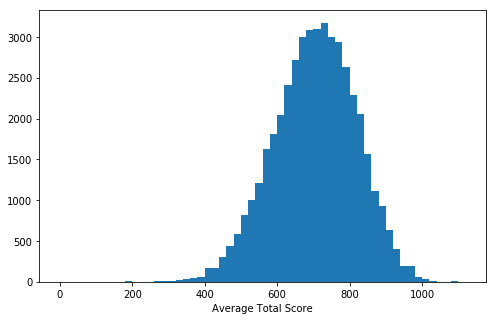

In [101]:
binsize = 20
bins = np.arange(0, pisa['Average Total Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Total Score', bins=bins)
plt.xlabel('Average Total Score')

Here we can see that it is a very normal distribution. This is generally not surprising since bell curves are expected when it comes to the grades of students.

We can now move onto the three scores that the total score is comprised of: Math, Reading, and Science.

Text(0.5, 0, 'Average Math Score')

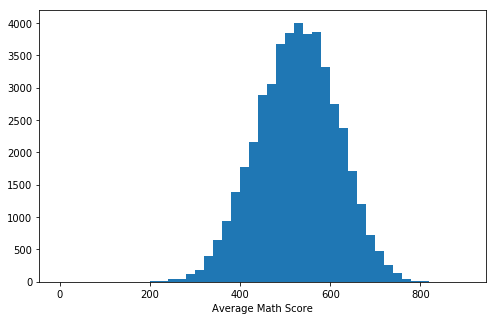

In [105]:
binsize = 20
bins = np.arange(0, pisa['Average Math Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Math Score', bins=bins)
plt.xlabel('Average Math Score')

Although the numbers along the x scale are a bit lower than they are for the total scores, we can easily say that this distribution is very much so like the total score in that it has a distinct normal distribution.

Text(0.5, 0, 'Average Reading Score')

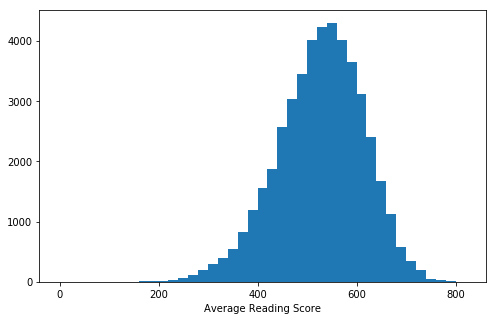

In [107]:
binsize = 20
bins = np.arange(0, pisa['Average Reading Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Reading Score', bins=bins)
plt.xlabel('Average Reading Score')

In [ ]:
Just as with the Math score

Text(0.5, 0, 'Average Science Score')

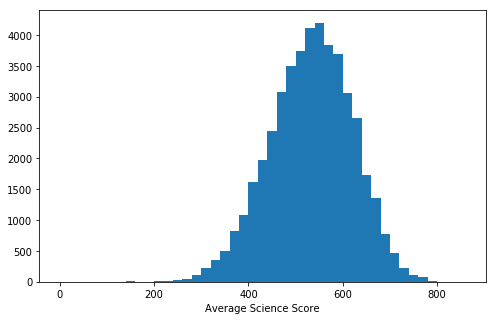

In [106]:
binsize = 20
bins = np.arange(0, pisa['Average Science Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Science Score', bins=bins)
plt.xlabel('Average Science Score')

Text(0.5, 0, 'Price ($)')

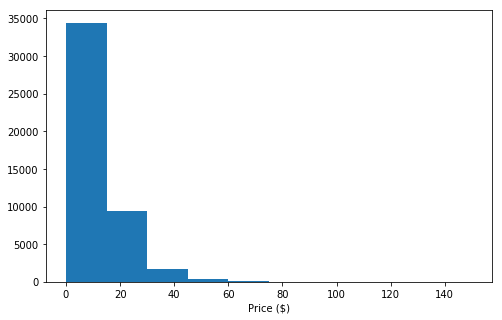

In [22]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Total')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

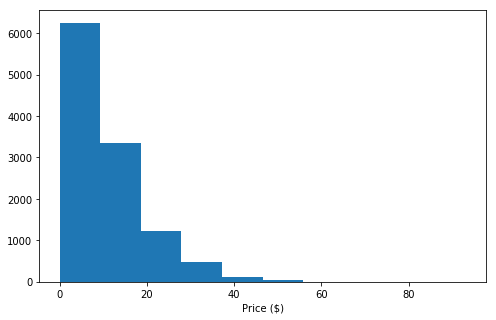

In [23]:
plt.figure(figsize=[8, 5])
plt.hist(data = high_grade, x = 'Out-of-School Study Time - Total')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

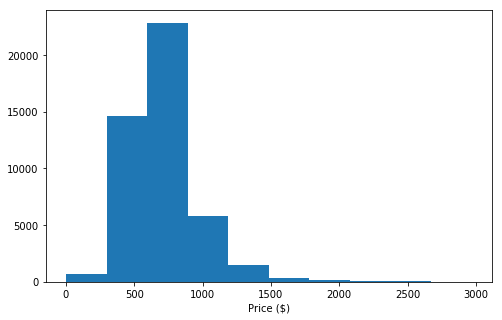

In [24]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Total')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

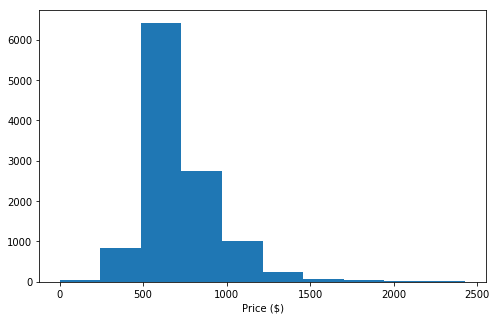

In [25]:
plt.figure(figsize=[8, 5])
plt.hist(data = high_grade, x = 'Learning Time - Total')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

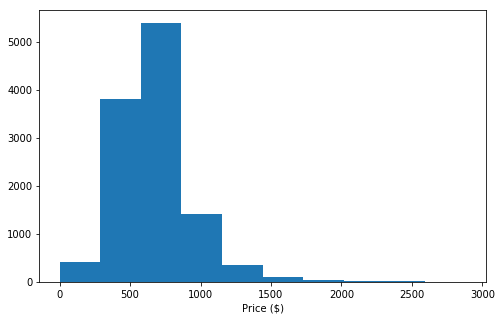

In [26]:
plt.figure(figsize=[8, 5])
plt.hist(data = low_grade, x = 'Learning Time - Total')
plt.xlabel('Price ($)')

In [27]:
pisa

,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total
0,1647,Male,2.0,1.0,0.0,0.0,0.0,150.0,200.0,350.0,449.53266,478.18156,474.20738,617.151420,<ISCED level 6>,<ISCED level 0>,3.0,700.0
1,18805,Female,0.0,0.0,0.0,0.0,0.0,150.0,150.0,150.0,438.93906,495.01800,456.39686,609.764327,<ISCED level 1>,<ISCED level 0>,0.0,450.0
2,18913,Male,2.0,1.0,0.0,0.0,1.0,200.0,150.0,150.0,486.99952,524.61420,498.26558,665.626273,<ISCED level 1>,<ISCED level 0>,4.0,500.0
3,12822,Male,30.0,30.0,30.0,30.0,30.0,360.0,240.0,120.0,284.08632,287.23844,312.23424,389.215107,<ISCED level 1>,<ISCED level 0>,150.0,720.0
4,9143,Male,4.0,2.0,0.0,0.0,6.0,250.0,250.0,100.0,334.32778,415.54968,389.07126,491.092167,<ISCED level 1>,<ISCED level 0>,12.0,600.0
5,10479,Male,2.0,0.0,0.0,0.0,0.0,200.0,200.0,600.0,376.85780,329.09998,330.04476,470.953447,<ISCED level 1>,<ISCED level 0>,2.0,1000.0
6,16295,Female,1.0,1.0,0.0,1.0,0.0,140.0,220.0,110.0,355.74856,424.95988,393.73368,510.063560,<ISCED level 1>,<ISCED level 0>,3.0,470.0
7,16142,Female,5.0,3.0,2.0,0.0,1.0,200.0,200.0,150.0,434.49916,365.22774,362.68184,532.302633,<ISCED level 1>,<ISCED level 0>,11.0,550.0
8,17761,Male,1.0,1.0,1.0,0.0,1.0,300.0,300.0,150.0,319.21638,331.18504,326.12832,431.915373,<ISCED level 1>,<ISCED level 0>,4.0,750.0
9,17846,Male,2.0,0.0,0.0,0.0,1.0,225.0,180.0,180.0,422.03614,430.94704,468.61244,581.210587,<ISCED level 1>,<ISCED level 0>,3.0,585.0


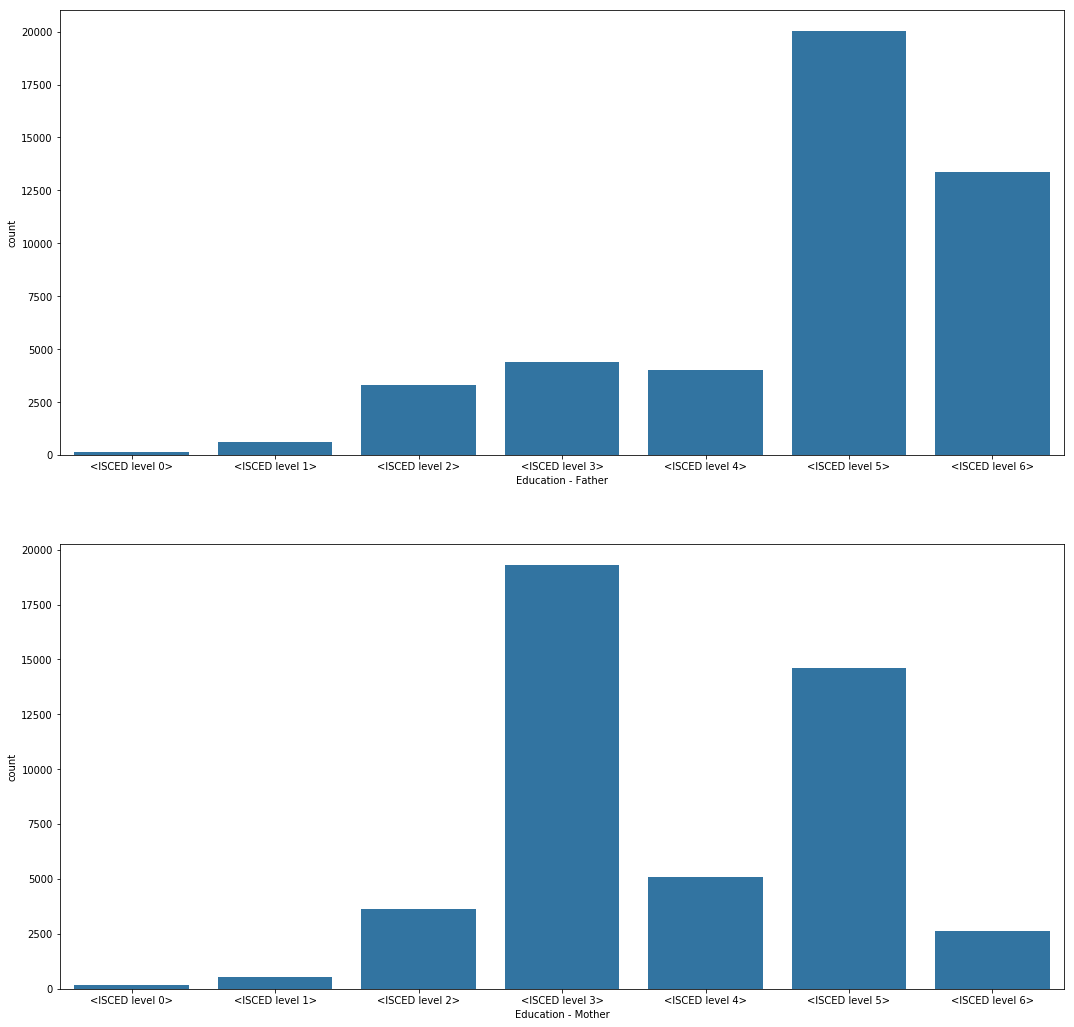

In [28]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [18,18])

default_color = sb.color_palette()[0]
sb.countplot(data = pisa, x = 'Education - Father', color = default_color, ax = ax[0])
sb.countplot(data = pisa, x = 'Education - Mother', color = default_color, ax = ax[1])

plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [29]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 'Average Total Score', 'Out-of-School Study Time - Total', 'Learning Time - Total']


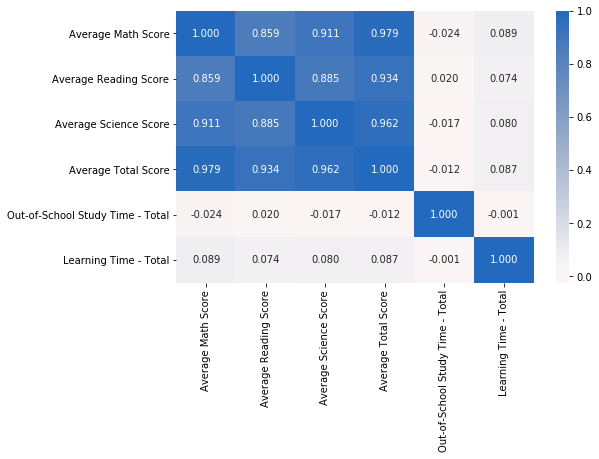

In [30]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [31]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Learning Time - Mathematics',
                'Learning Time - Test Language', 'Learning Time - Science', 
                'Learning Time - Total']


In [32]:
list(pisa)

['Student ID',
 'Gender',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning Time - Mathematics',
 'Learning Time - Test Language',
 'Learning Time - Science',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning Time - Total']

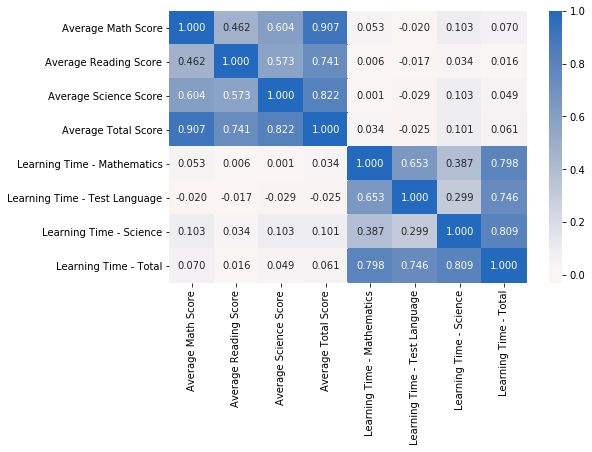

In [33]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(high_grade[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

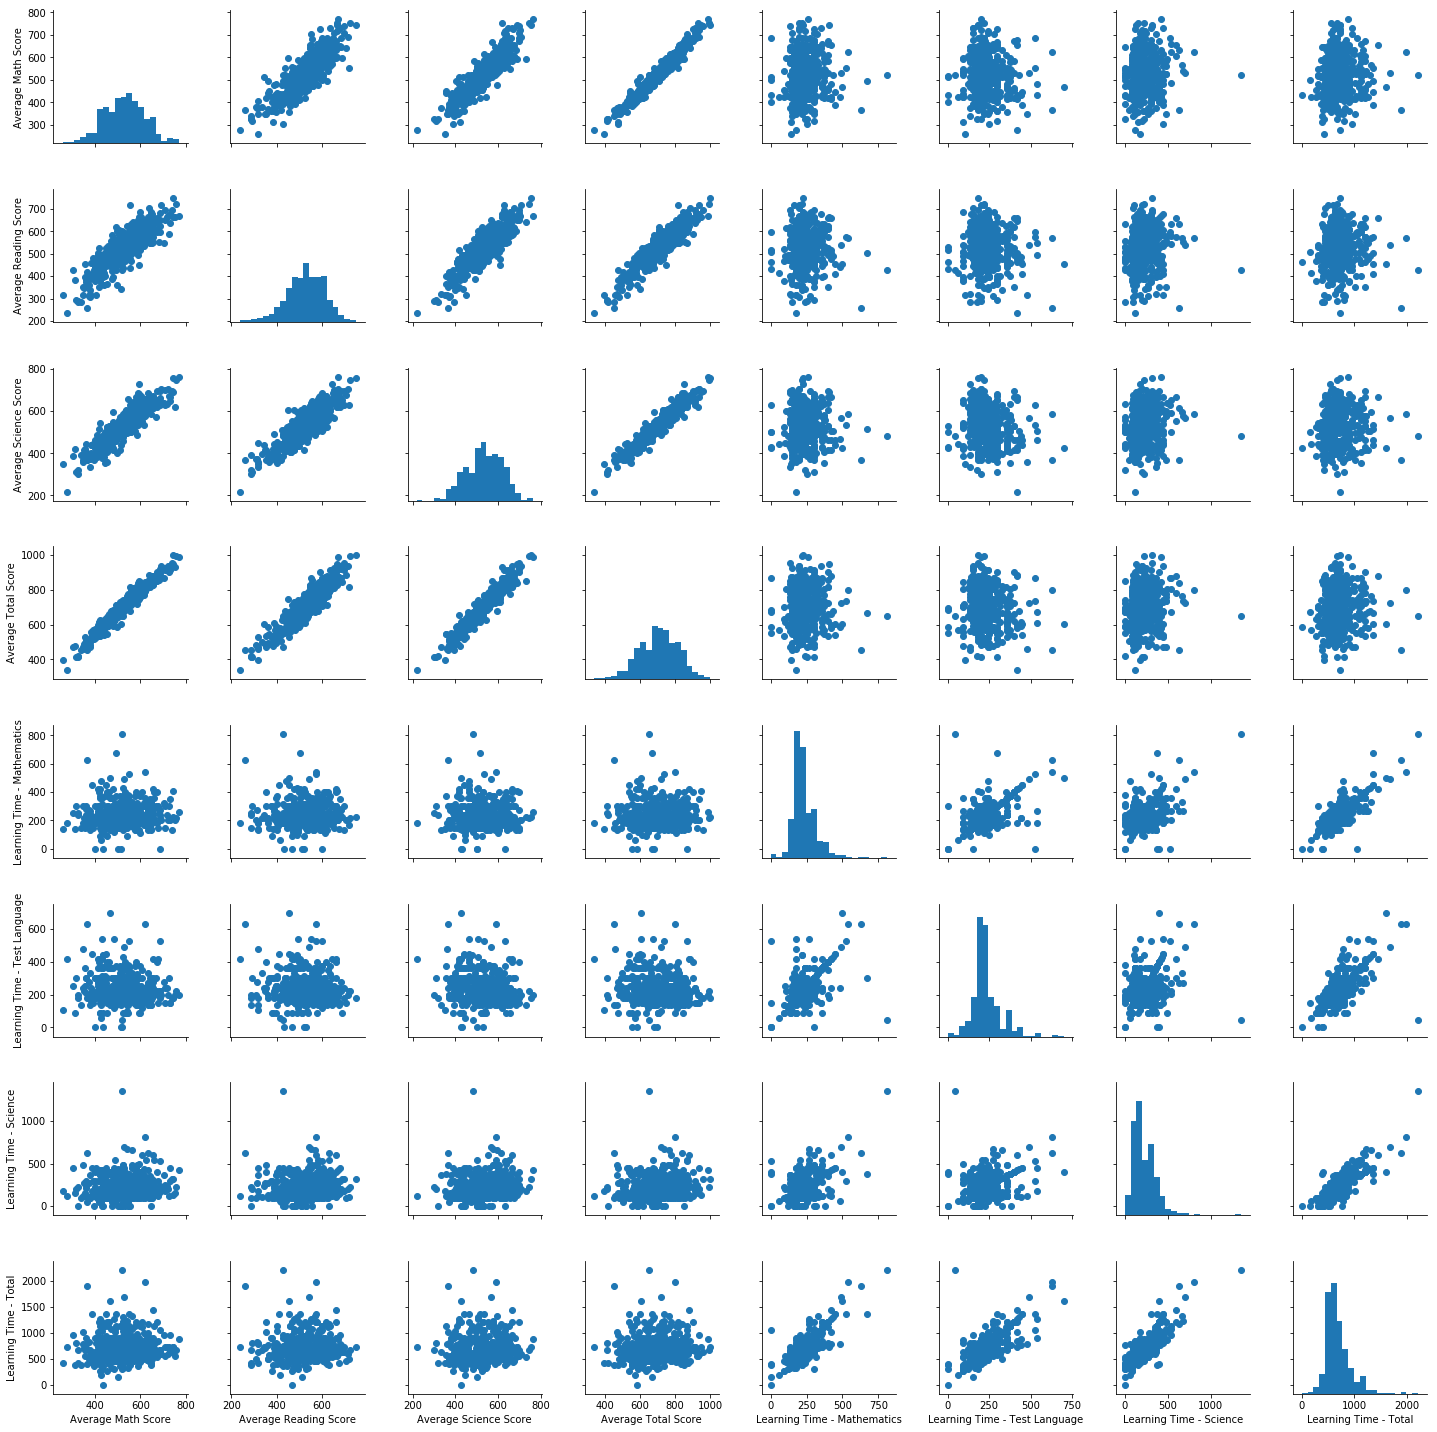

In [34]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [35]:
homework_vars = ['Out-of-School Study Time - Homework',
                      'Out-of-School Study Time - Guided Homework',
                      'Out-of-School Study Time - Personal Tutor',
                      'Out-of-School Study Time - Commercial Company',
                      'Out-of-School Study Time - With Parent',
                      'Learning Time - Mathematics',
                      'Learning Time - Test Language',
                      'Learning Time - Science']

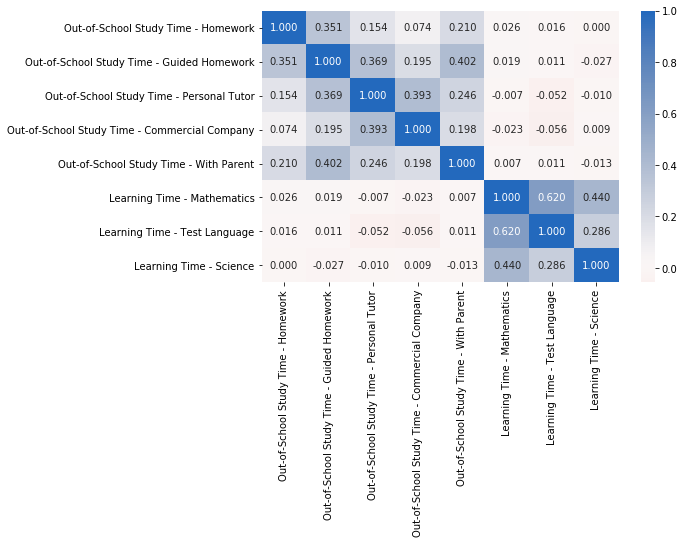

In [36]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[homework_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

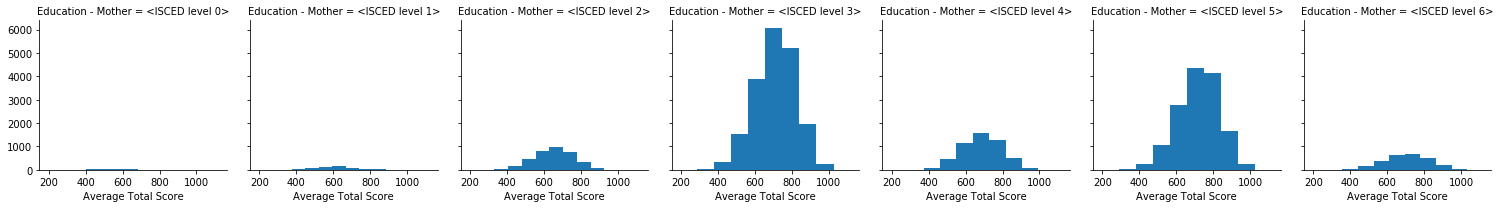

In [86]:
g = sb.FacetGrid(data = pisa, col = 'Education - Mother');
g.map(plt.hist, 'Average Total Score');

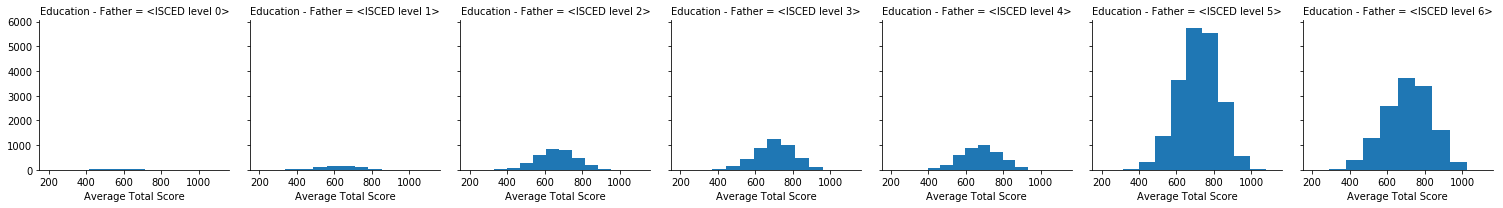

In [87]:
g = sb.FacetGrid(data = pisa, col = 'Education - Father');
g.map(plt.hist, 'Average Total Score');

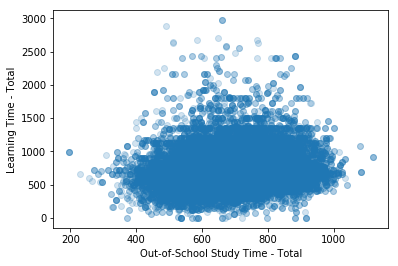

In [37]:
sb.regplot(data= pisa, x = 'Average Total Score', 
           y = 'Learning Time - Total', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning Time - Total');

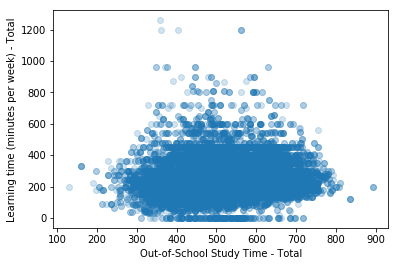

In [38]:
sb.regplot(data= pisa, x = 'Average Math Score', 
           y = 'Learning Time - Mathematics', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

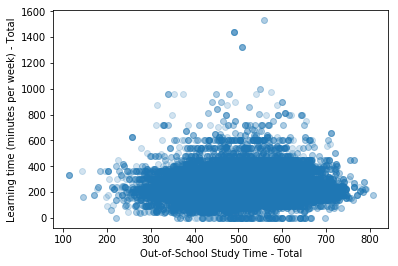

In [39]:
sb.regplot(data= pisa, x = 'Average Reading Score', 
           y = 'Learning Time - Test Language', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

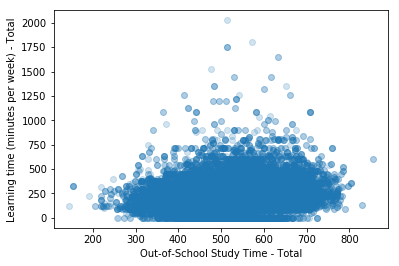

In [40]:
sb.regplot(data= pisa, x = 'Average Science Score', 
           y = 'Learning Time - Science', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

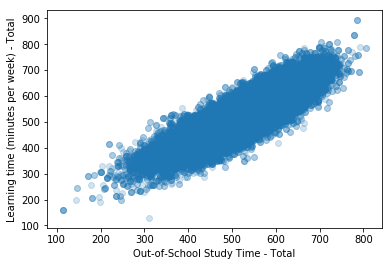

In [41]:
sb.regplot(data= pisa, x = 'Average Reading Score', 
           y = 'Average Math Score', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

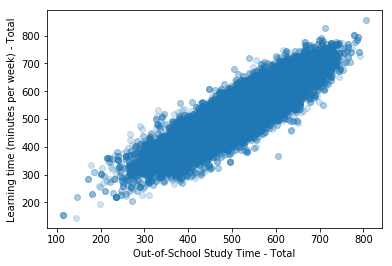

In [42]:
sb.regplot(data= pisa, x = 'Average Reading Score', 
           y = 'Average Science Score', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

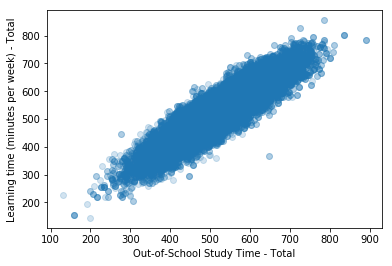

In [43]:
sb.regplot(data= pisa, x = 'Average Math Score', 
           y = 'Average Science Score', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5})
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

In [79]:
list(pisa)

['Student ID',
 'Gender',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning Time - Mathematics',
 'Learning Time - Test Language',
 'Learning Time - Science',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning Time - Total']

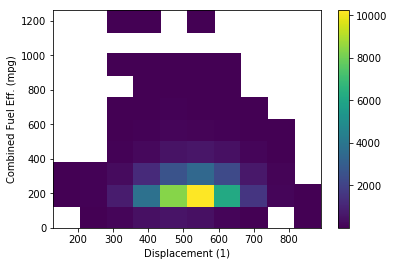

In [82]:
plt.hist2d(data = pisa, x = 'Average Math Score', 
           y = 'Learning Time - Mathematics', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

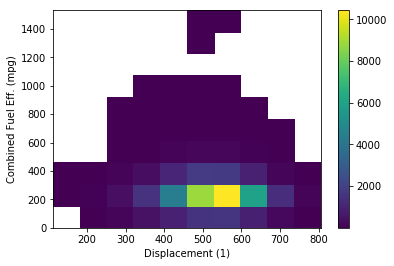

In [85]:
plt.hist2d(data = pisa, x = 'Average Reading Score', 
           y = 'Learning Time - Test Language', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

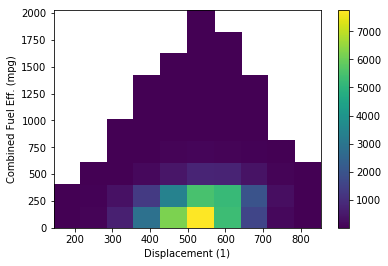

In [84]:
plt.hist2d(data = pisa, x = 'Average Science Score', 
           y = 'Learning Time - Science', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

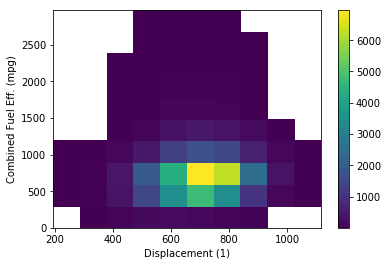

In [81]:
plt.hist2d(data = pisa, x = 'Average Total Score', 
           y = 'Learning Time - Total', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

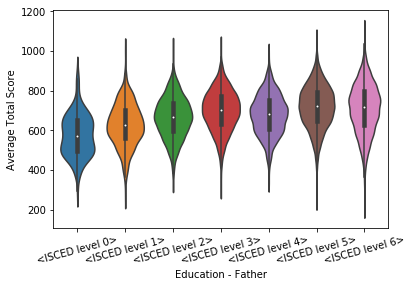

In [45]:
sb.violinplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

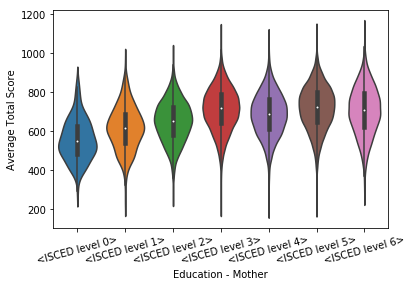

In [46]:
sb.violinplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

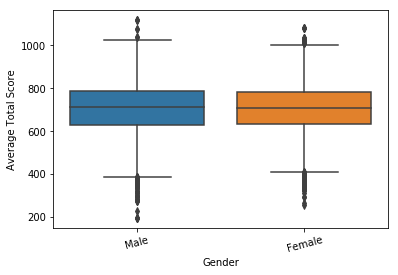

In [51]:
sb.boxplot(data = pisa, 
              x = 'Gender', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

In [ ]:
list(pisa)

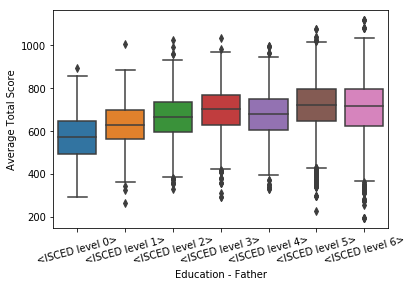

In [52]:
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

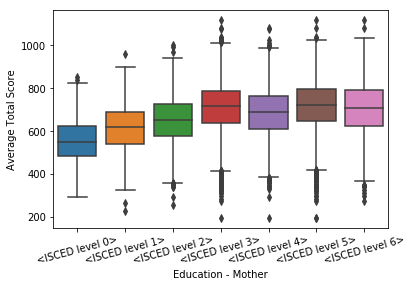

In [53]:
sb.boxplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

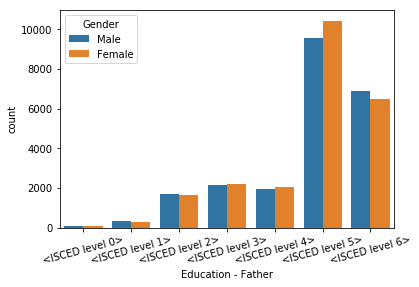

In [54]:
sb.countplot(data = pisa, x = 'Education - Father', hue = 'Gender')
plt.xticks(rotation = 15);

In [55]:
# fix y axis
g = sb.FacetGrid(data = pisa, col = 'How many books at home', col_wrap = 3, sharey = False);
g.map(plt.hist, 'Average Total Score');

KeyError: 'How many books at home'

In [ ]:
base_color = sb.color_palette()[9]
sb.barplot(data = pisa, 
              x = 'How many books at home', 
              y = 'Average Total Score',
              color = base_color);
plt.xticks(rotation = 15);

In [ ]:
base_color = sb.color_palette()[9]
sb.barplot(data = pisa, 
           x = 'How many books at home', 
           y = 'Average Total Score',
           color = base_color,
           ci = 'sd')
plt.xticks(rotation = 15);

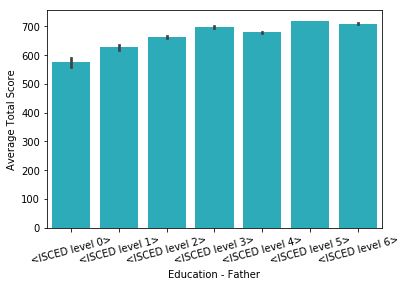

In [69]:
base_color = sb.color_palette()[9]
sb.barplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              color = base_color);
plt.xticks(rotation = 15);

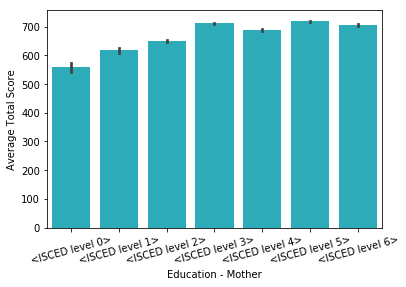

In [70]:
base_color = sb.color_palette()[9]
sb.barplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = base_color);
plt.xticks(rotation = 15);

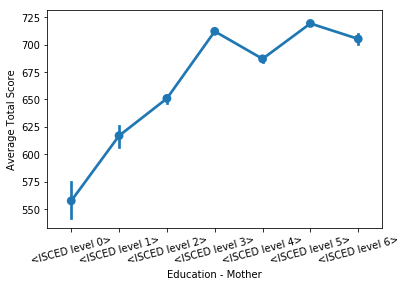

In [59]:
sb.pointplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score');
plt.xticks(rotation = 15);

In [60]:
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

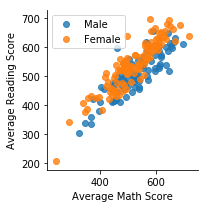

In [61]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Math Score', 'Average Reading Score', fit_reg = False)
plt.legend();

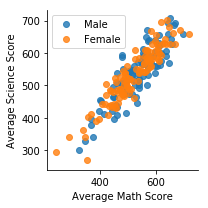

In [62]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Math Score', 'Average Science Score', fit_reg = False)
plt.legend();

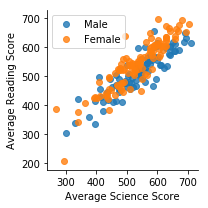

In [63]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Science Score', 'Average Reading Score', fit_reg = False)
plt.legend();

In [64]:
list(pisa)

['Student ID',
 'Gender',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning Time - Mathematics',
 'Learning Time - Test Language',
 'Learning Time - Science',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning Time - Total']

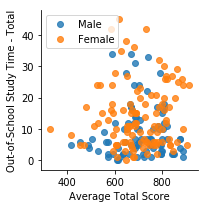

In [65]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Total', fit_reg = False)
plt.legend();

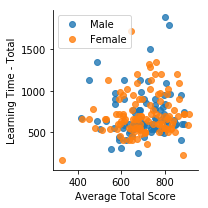

In [66]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender')
g.map(sb.regplot, 'Average Total Score', 'Learning Time - Total', fit_reg = False)
plt.legend();

In [67]:
pisa.loc[pisa['Learning Time - Total'] >= 2900]

,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total
4827,7677,Female,4.0,1.0,0.0,0.0,1.0,900.0,315.0,1755.0,487.15534,495.9712,513.46514,661.249007,<ISCED level 4>,<ISCED level 3>,6.0,2970.0
27386,7677,Female,4.0,1.0,0.0,0.0,1.0,900.0,315.0,1755.0,487.15534,495.9712,513.46514,661.249007,<ISCED level 4>,<ISCED level 4>,6.0,2970.0
41446,7677,Female,4.0,1.0,0.0,0.0,1.0,900.0,315.0,1755.0,487.15534,495.9712,513.46514,661.249007,<ISCED level 4>,<ISCED level 5>,6.0,2970.0


ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = 0          Male
1        Female
2          Male
3          Male
4          Male
5          Male
6        Female
7        Female
8          Male
9          Male
10       Female
11       Female
12         Male
13       Female
14         Male
15         Male
16         Male
17         Male
18       Female
19         Male
20       Female
21       Female
22         Male
23         Male
24       Female
25         Male
26         Male
27       Female
28       Female
29       Female
          ...  
45877    Female
45878      Male
45879      Male
45880    Female
45881    Female
45882      Male
45883    Female
45884      Male
45885    Female
45886      Male
45887    Female
45888      Male
45889      Male
45890      Male
45891    Female
45892    Female
45893      Male
45894    Female
45895      Male
45896    Female
45897      Male
45898    Female
45899      Male
45900    Female
45901      Male
45902    Female
45903    Female
45904      Male
45905      Male
45906      Male
Name: Gender, Length: 45907, dtype: object.

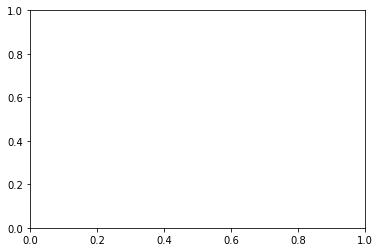

In [68]:
plt.scatter(data = pisa, 
            y = 'Learning Time - Total',
            x = 'Average Total Score',
            c = 'Gender')
plt.colorbar();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [75]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score']

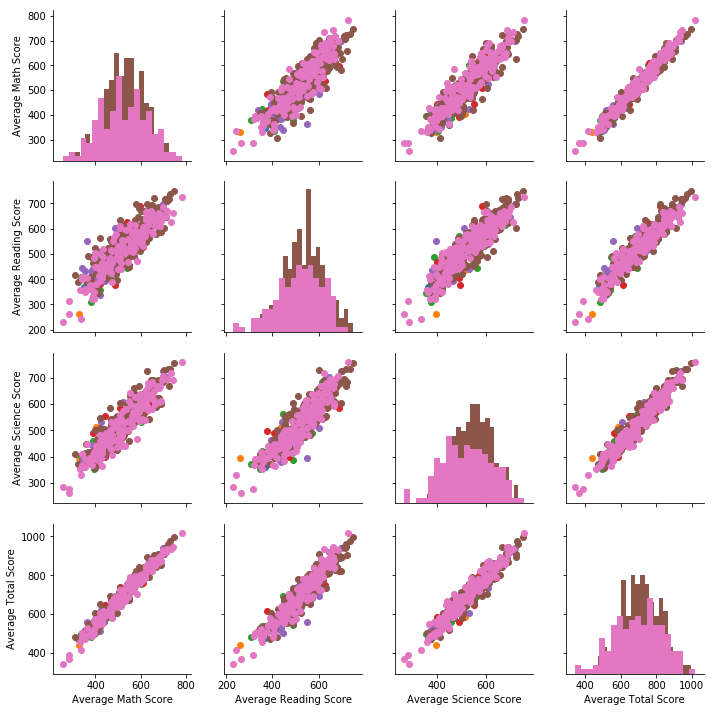

In [78]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = numeric_vars, hue='Education - Father')
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [73]:
list(pisa)

['Student ID',
 'Gender',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning Time - Mathematics',
 'Learning Time - Test Language',
 'Learning Time - Science',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning Time - Total']

In [ ]:
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

In [ ]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Education - Father')
g.map(sb.regplot, 'Average Total Score', 'Average Math Score',  x_jitter = 0.04, fit_reg = False)
plt.legend()
plt.ylabel('Combined Fuel Eff. (mpg)');

In [ ]:
plt.figure(figsize = [8,6])
plt.scatter(data = pisa, 
            y = 'Average Math Score',
            x = 'Average Reading Score',
            c = 'Average Total Score')
# plt.xlim(0, 160)
# plt.ylim(15, 160)
plt.colorbar(label = 'Speed')
plt.xlabel('Defense')
plt.ylabel('Special Defense');

In [ ]:
pisa['Gender'].value_counts()

In [ ]:
list(pisa)

In [ ]:
pisa_sub = pisa.loc[pisa['Gender'].isin(['Male', 'Female'])]

sb.boxplot(data = pisa_sub, 
              x = 'Average Science Score', 
              y = 'Learning Time - Science',
             hue = 'Gender');
plt.xticks(rotation = 15);
plt.ylabel('Displacement (1)')
plt.xlabel('Vehicle Class')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!